# Exercicio de Clusterização


Vamos trabalhar com o dataset customers. O conjunto de dados original está [disponível na UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). No nosso dataset dataset foram removidos os atributos 'Channel' e 'Region' para facilitar a análise, pois o foco é verificarmos as seis categorias de produtos comprados pelos clientes, mas fique a vontade para trabalhar com o dado original. Após a remoção das duas variáveis citadas ficamos com o dataset final que será compostos de seis categorias importantes de produtos: Fresh, Milk, Grocery, Frozen, Detergents_Paper e Delicatessen (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene e Padaria/Frios)

#### Import as bibliotecas
Vamos importar algumas bibliotecas para começar!

In [257]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import pi
import numpy as np

#### Acesse os dados disponíveis em customers.csv

In [383]:
data = pd.read_csv('customers.csv')
data = data[data.columns.difference(['Channel', 'Region'])]

In [384]:
data.head()

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
0,1338,2674,12669,214,7561,9656
1,1776,3293,7057,1762,9568,9810
2,7844,3516,6353,2405,7684,8808
3,1788,507,13265,6404,4221,1196
4,5185,1777,22615,3915,7198,5410


In [385]:
scaler = MinMaxScaler()
values = scaler.fit_transform(data)

In [386]:
data = pd.DataFrame(values, columns = data.columns)

#### Aplique pré-processamento sobre os dados para criar seu dataset alvo, se você julgar necessário. *Considere remover os outiliers em mais de um atributo*

In [387]:
data.columns

Index(['Delicatessen', 'Detergents_Paper', 'Fresh', 'Frozen', 'Grocery',
       'Milk'],
      dtype='object')

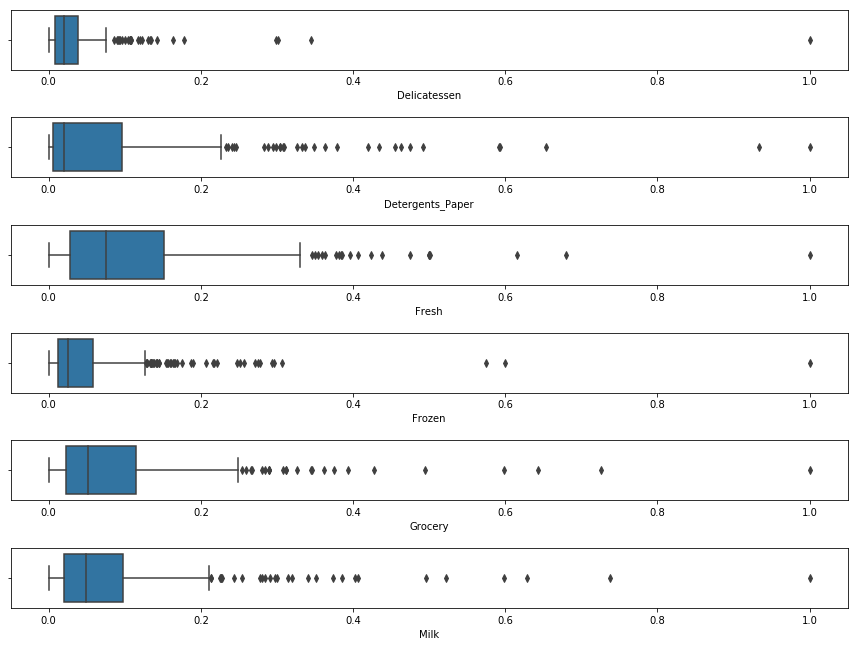

In [388]:
fig, ax = plt.subplots(nrows = 6, figsize = (15, 11))

for i, column in enumerate(data.columns):
    sns.boxplot(x = column, data = data, ax = ax[i])
    
plt.subplots_adjust(hspace=0.8)
plt.show()

In [389]:
data.shape

(440, 6)

In [390]:
for column in data.columns:
    data = data[(data[column] >= (data[column].mean() - 3 * data[column].std())) & (data[column] <= (data[column].mean() + 3 * data[column].std()))]

In [391]:
data.shape

(397, 6)

In [392]:
# to avoid the overwriter file
dataset = data.copy()

#### Aplique o algoritmo [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), sobre o dataset criado. Julgue a necessidade de aplicar PCA ou não. Veja mais em nota, no final do exercício.

In [432]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [433]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [434]:
pd.DataFrame(kmeans.labels_, columns = ['Label'])['Label'].value_counts()

1    298
0     99
Name: Label, dtype: int64

#### Aplique o método da [silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) e verifique a qualidade do cluster gerado

In [435]:
from sklearn.metrics import silhouette_score

In [436]:
preds = kmeans.predict(data)

In [437]:
silhouette_score(data, preds)

0.3842583545813093

#### Analise os resultados, utilizando as seguintes métricas de avaliação para clusters[(completeness e homogeneity)](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure) (leia sobre elas na documentação).

 #### Varie o número de K, hiper parâmetro do K-Means e identifique o melhor valor considerando o método da silhueta.

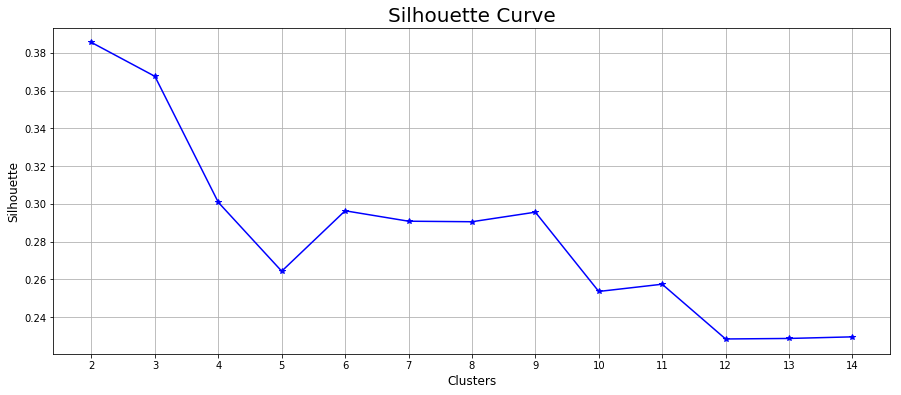

In [438]:
sil = []
for k in range(2, 15):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data)
    sil.append(silhouette_score(data, kmeans_.predict(data)))

cluster = np.arange(2, 15)
sil = np.array(sil)

plt.figure(figsize = (15, 6))
plt.plot(cluster, sil, 'b*-')

plt.title("Silhouette Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Silhouette", fontsize = 12)

plt.xticks(cluster)
plt.grid()

plt.show()

 #### Varie o número de K, hiper parâmetro do K-Means e identifique o melhor valor considerando o método da curva do cotovelo, [veja este exemplo](https://pythonprogramminglanguage.com/kmeans-elbow-method/). O resultado obtido foi igual ao aplicado na questão anterior?

In [439]:
from scipy.spatial.distance import cdist

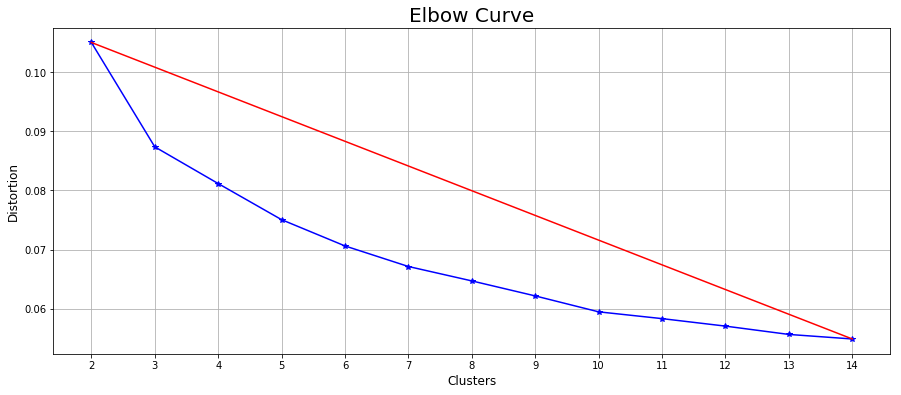

In [440]:
distortions = []
for k in range(2, 15):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data)
    distortions.append(
        sum(np.min(
                    cdist(data, kmeans_.cluster_centers_, 'euclidean'), axis=1)
                           ) 
                / data.shape[0]
    )
    
cluster = np.arange(2, 15)
distortions = np.array(distortions)

plt.figure(figsize = (15, 6))
plt.plot(cluster, distortions, 'b*-')
plt.plot(np.array([cluster[0], cluster[-1]]), np.array([distortions[0], distortions[-1]]), color = 'r')

plt.title("Elbow Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Distortion", fontsize = 12)
plt.xticks(cluster)
plt.grid()

plt.show()

#### Recupere os centroídes e faça um radar chart considerando os centroídes, [veja este exemplo](https://python-graph-gallery.com/391-radar-chart-with-several-individuals/). *P.S.: Para recuperar os centroídes use kmeans.cluster_centers_*

In [441]:
df = pd.DataFrame(kmeans.cluster_centers_, columns = ['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6'])

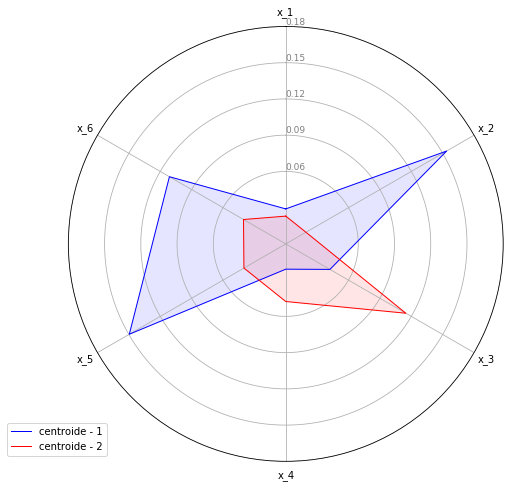

In [442]:
plt.figure(figsize = (20, 8))

# number of variable
categories=df.columns.tolist()
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.06, 0.09, 0.12, 0.15, 0.18], ["0.06","0.09", "0.12","0.15", "0.18"], color="grey", size=9)
plt.ylim(0,0.18)

## Step 2
for r, color in zip(np.arange(df.shape[0]), ['b', 'r', 'y', 'k']):
    values = df.loc[r].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label= f"centroide - {r + 1}", color =color)
    ax.fill(angles, values, color, alpha=0.1)
    

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

#### Os resultados parecem favoráveis os centroídes são de fato distintos? Como você interpreta os dados com base nesta informação?*

#### Recupere as amostras de cada cluster e faça um parallel coordinates, [veja este exemplo](https://python-graph-gallery.com/150-parallel-plot-with-pandas/) ou [este](https://jovianlin.io/data-visualization-seaborn-part-2/). Os resultados parecem favoráveis e os centroídes são de fato distintos? Como você interpreta os dados com base nesta informação?

In [443]:
dataset['Cluster'] = kmeans.predict(data)

C:\Users\igor_sousa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


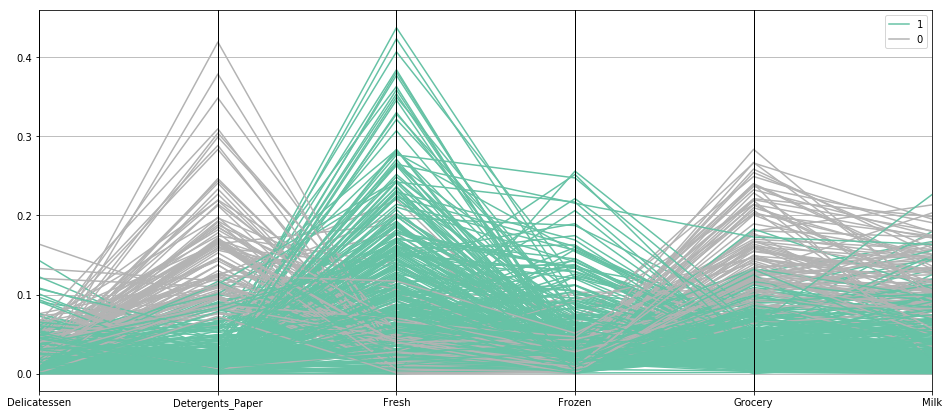

In [444]:
plt.figure(figsize = (16, 7))
# Make the plot
parallel_coordinates(dataset, 'Cluster', colormap=plt.get_cmap("Set2"))
plt.show()


#### Crie alguns gráficos, scatterplot do cluster, mostrando os dados definidos pelo cluster. Que tal tentar marcar os centroídes neste gráfico? *P.S.: Se você criou o PCA construa o gráfico considerando variações das 4 primeiras componentes*

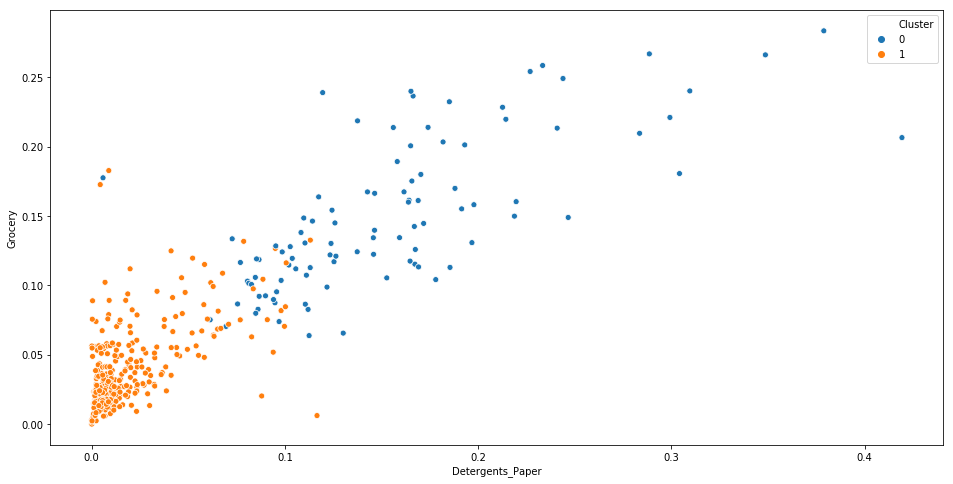

In [431]:
sns.scatterplot(x = 'Detergents_Paper', y = 'Grocery', hue = 'Cluster', data = dataset, ax = plt.subplots(figsize = (16, 8))[1])

#### Refaça todos passos, quando aplicáveis, considerando o algoritmo [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), [veja este exemplo](http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html), considerando variações nos hiperparâmetros, numMinPoints e eps.

# Nota

#### É muito comum aplicar PCA para reduzir a dimensionalidade dos dados, principalmente quando trabalhamos com aprendizagem não supervisionada. Para isso é necessário interpretar o quanto as componentes explicam a variação nos dados, por exemplo, qual o número de componentes utilizar e o cumulativo total que representa as componentes sobre os dados. Também é preciso explicar como as componenentes se relaciona as variáveis originais do dado, considerando todas as amostras ou parte delas. Nesses dois sites há dicas de como compreender melhor essa interpretação [dica_1](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/) e [dica_2](https://newonlinecourses.science.psu.edu/stat505/node/54/)